<a href="https://colab.research.google.com/github/dot-eagle/0x00-python-hello_world/blob/master/tc-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Check 4 Notebook

### **Installing and Importing Key Libraries**

In [1]:
!pip install ydata-profiling
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from string import ascii_letters
from ydata_profiling import ProfileReport
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             mean_absolute_error, mean_squared_error, r2_score,
                             confusion_matrix, classification_report, accuracy_score,
                             classification_report, confusion_matrix)

print(f"========== Done importing key libaries... ============")

========== Done importing key libaries... ============


### **Load our data and create some Pandas Dataframe**

**Dataset**: the TMDB Movies Dataset from Kaggle: [TMDB Movie Metadata](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)


This dataset includes:

*   Numeric features and Categorical features
*   Our Target variable will be revenue




In [6]:
url_TMDB_Movies = pd.read_csv('https://raw.githubusercontent.com/NSCC-ITC-Fall2025-DBAS5115-700-MCr/tech-check-4-dot-eagle/refs/heads/main/tmdb_5000_movies.csv?token=GHSAT0AAAAAADLE5OI665OGDZYQRD26B53S2JXGTUA')
df = pd.DataFrame(url_TMDB_Movies)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### **View a few stats on the TMDB Movies Dataset**

In [7]:
# view some data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [8]:
# describe a few stats
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [9]:
# Checking for  NULL values
df.isnull().sum()
#df.isnull().any()

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


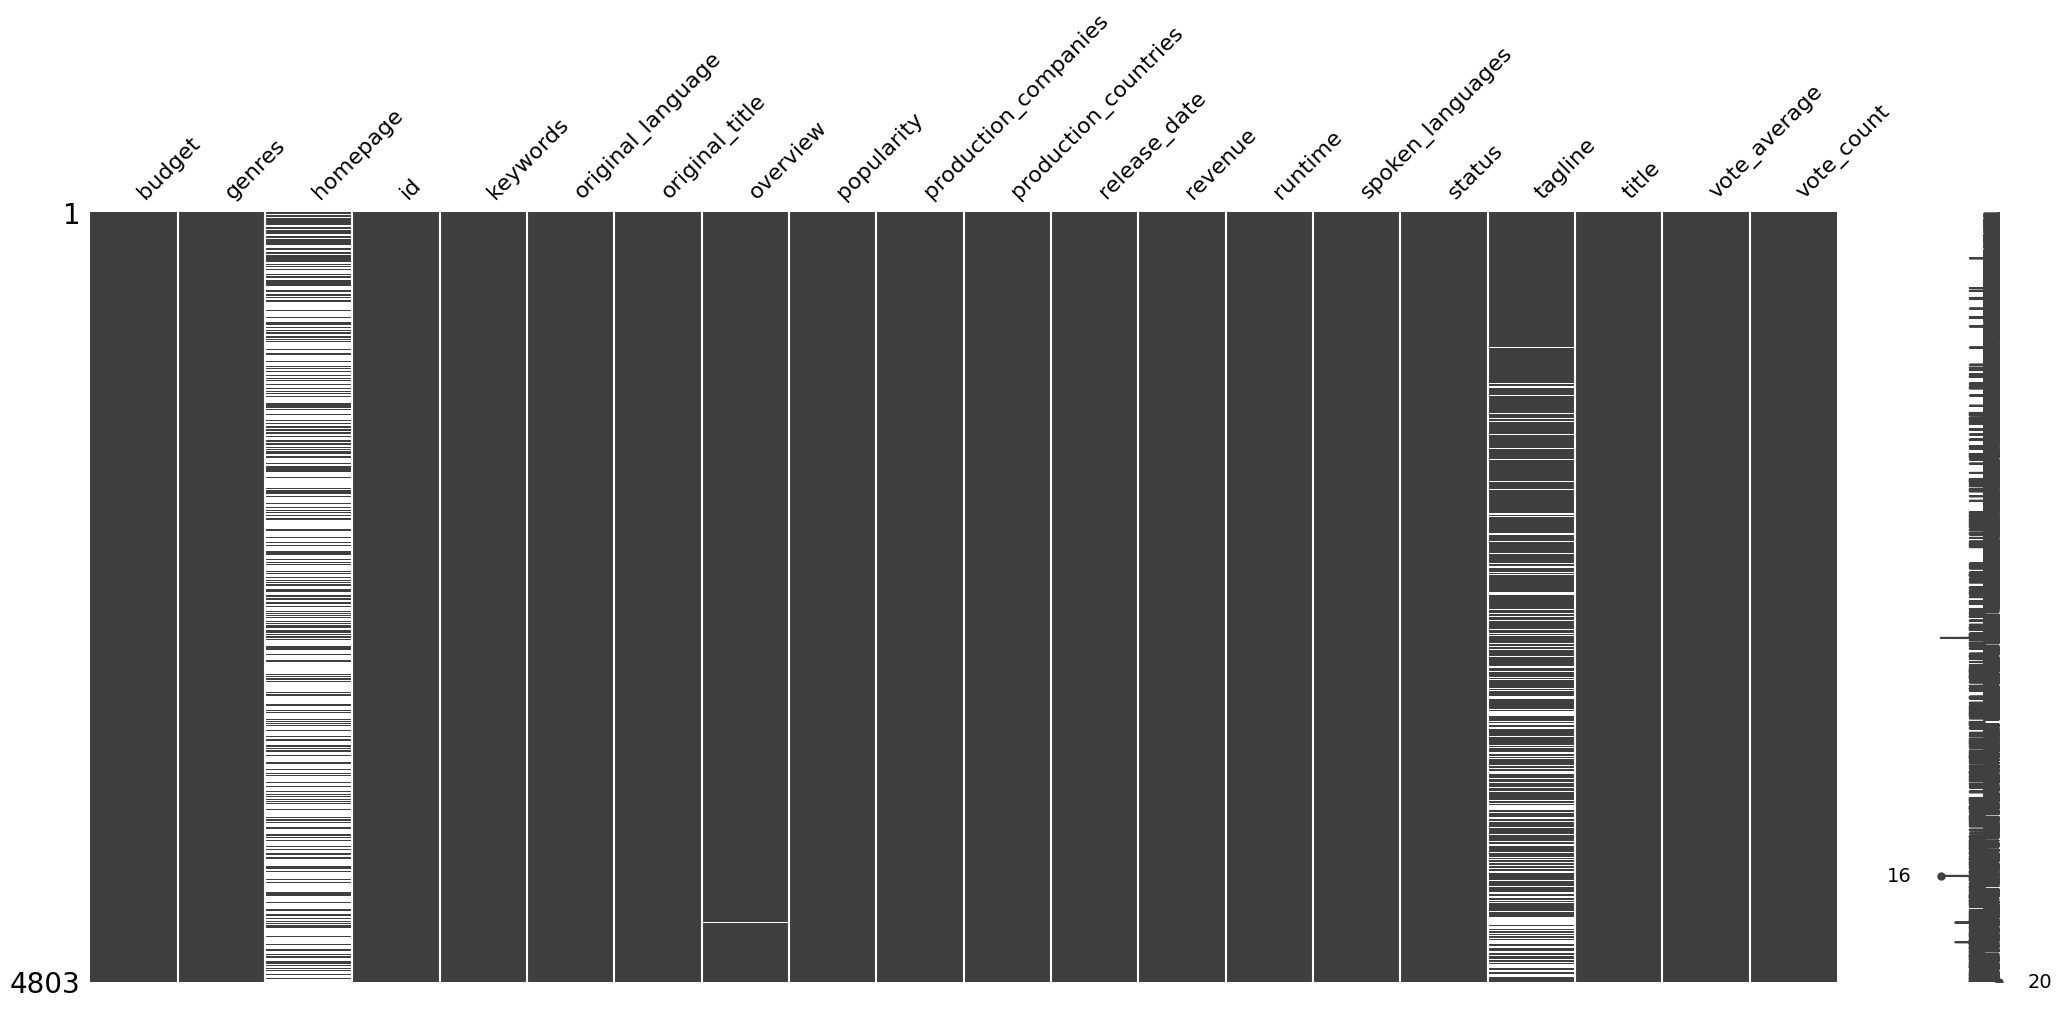


 Null values/Missing data plot view of TMDB Movies Dataset generated successfully.


In [10]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(df)
plt.show()
print("\n Null values/Missing data plot view of TMDB Movies Dataset generated successfully.")

In [11]:
df['status'].value_counts()

,count
status,
Released,4795
Rumored,5
Post Production,3


In [5]:
dm = pd.get_dummies(df, columns=['status']) #, 'genres'])
dm.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,status_Post Production,status_Released,status_Rumored
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,Avatar,7.2,11800,False,True,False
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,False,True,False
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,Spectre,6.3,4466,False,True,False
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,The Dark Knight Rises,7.6,9106,False,True,False
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",John Carter,6.1,2124,False,True,False


In [48]:
dm['status'].value_counts()

KeyError: 'status'

#### **Computing the correlation matrix**

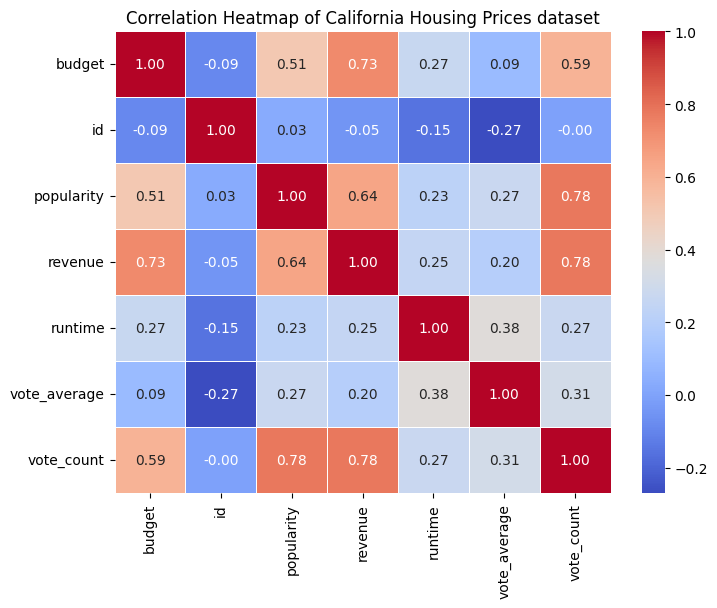


 Correlation Heatmap of TMDB Movies Dataset generated successfully.


In [12]:
# correlation_matrix = titanic_df.corr(numeric_only=True)
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

# Create the Heatmap: Use seaborn.heatmap() to visualize the correlation matrix.
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.7)
plt.title('Correlation Heatmap of California Housing Prices dataset')
plt.show()
print("\n Correlation Heatmap of TMDB Movies Dataset generated successfully.")

In [13]:
import json
#Flatten the JSON fileds andget the first genre
dm['genres'] = dm['genres'].apply(lambda x: [d['name'] for d in json.loads(x)])
dm['genres'] = dm['genres'].str[0]


NameError: name 'dm' is not defined

In [9]:
dm.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,status_Post Production,status_Released,status_Rumored
0,237000000,Action,http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,Avatar,7.2,11800,False,True,False
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,False,True,False
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,Spectre,6.3,4466,False,True,False
3,250000000,Action,http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,The Dark Knight Rises,7.6,9106,False,True,False
4,260000000,Action,http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",John Carter,6.1,2124,False,True,False


In [13]:
dm['genres'].value_counts()

,count
genres,
Drama,1207
Comedy,1042
Action,754
Adventure,339
Horror,300
Crime,195
Thriller,194
Animation,123
Fantasy,117


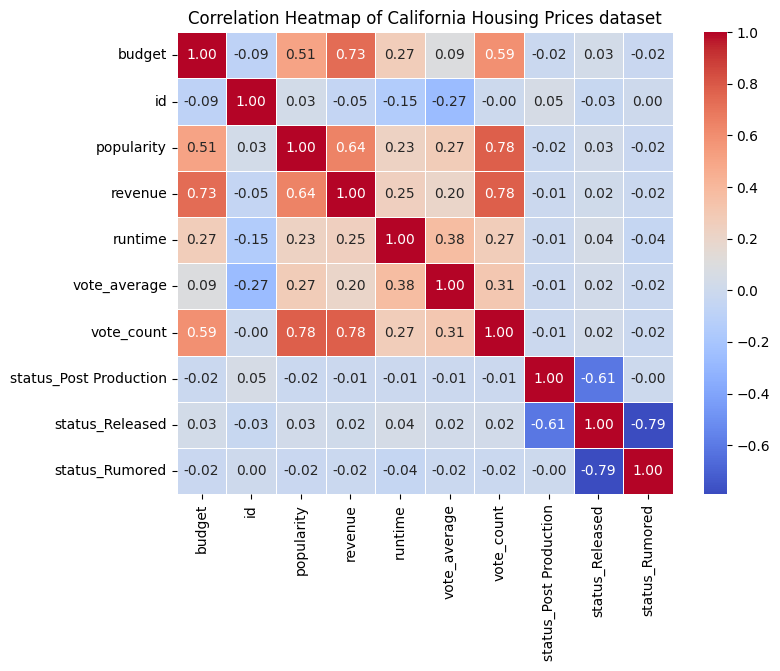


 Correlation Heatmap of TMDB Movies Dataset generated successfully.


In [14]:
# correlation_matrix = titanic_df.corr(numeric_only=True)
correlation_matrix = dm.corr(numeric_only=True)
correlation_matrix

# Create the Heatmap: Use seaborn.heatmap() to visualize the correlation matrix.
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.7)
plt.title('Correlation Heatmap of California Housing Prices dataset')
plt.show()
print("\n Correlation Heatmap of TMDB Movies Dataset generated successfully.")

**YData profiling**

In [17]:
# identify only numericals
num_cols = df.select_dtypes(include=np.number)
num_cols.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124


In [38]:

profile = ProfileReport(num_cols, title="Profiling Report")
#profile.to_notebook_iframe()

print("\n The ydata_profiling report successfully provided a comprehensive overview of the dataset.")

TypeCheckError: argument "df" (pandas.core.indexes.base.Index) did not match any element in the union:
  pandas.core.frame.DataFrame: is not an instance of pandas.core.frame.DataFrame
  pyspark.sql.dataframe.DataFrame: is not an instance of pyspark.sql.dataframe.DataFrame
  NoneType: is not an instance of NoneType

In [14]:
profile = ProfileReport(num_cols, title='TMDB Movies Dataset Profiling Report')
#profile.to_file("Wine_data_yprofiling_report.html")
print("\n Profiling report generated successfully as TMDB_Movies_yprofiling_report.html")


 Profiling report generated successfully as TMDB_Movies_yprofiling_report.html


Generate and plot **box plots** for each numerical column in the DataFrame to identify potential outliers and understand their spread.

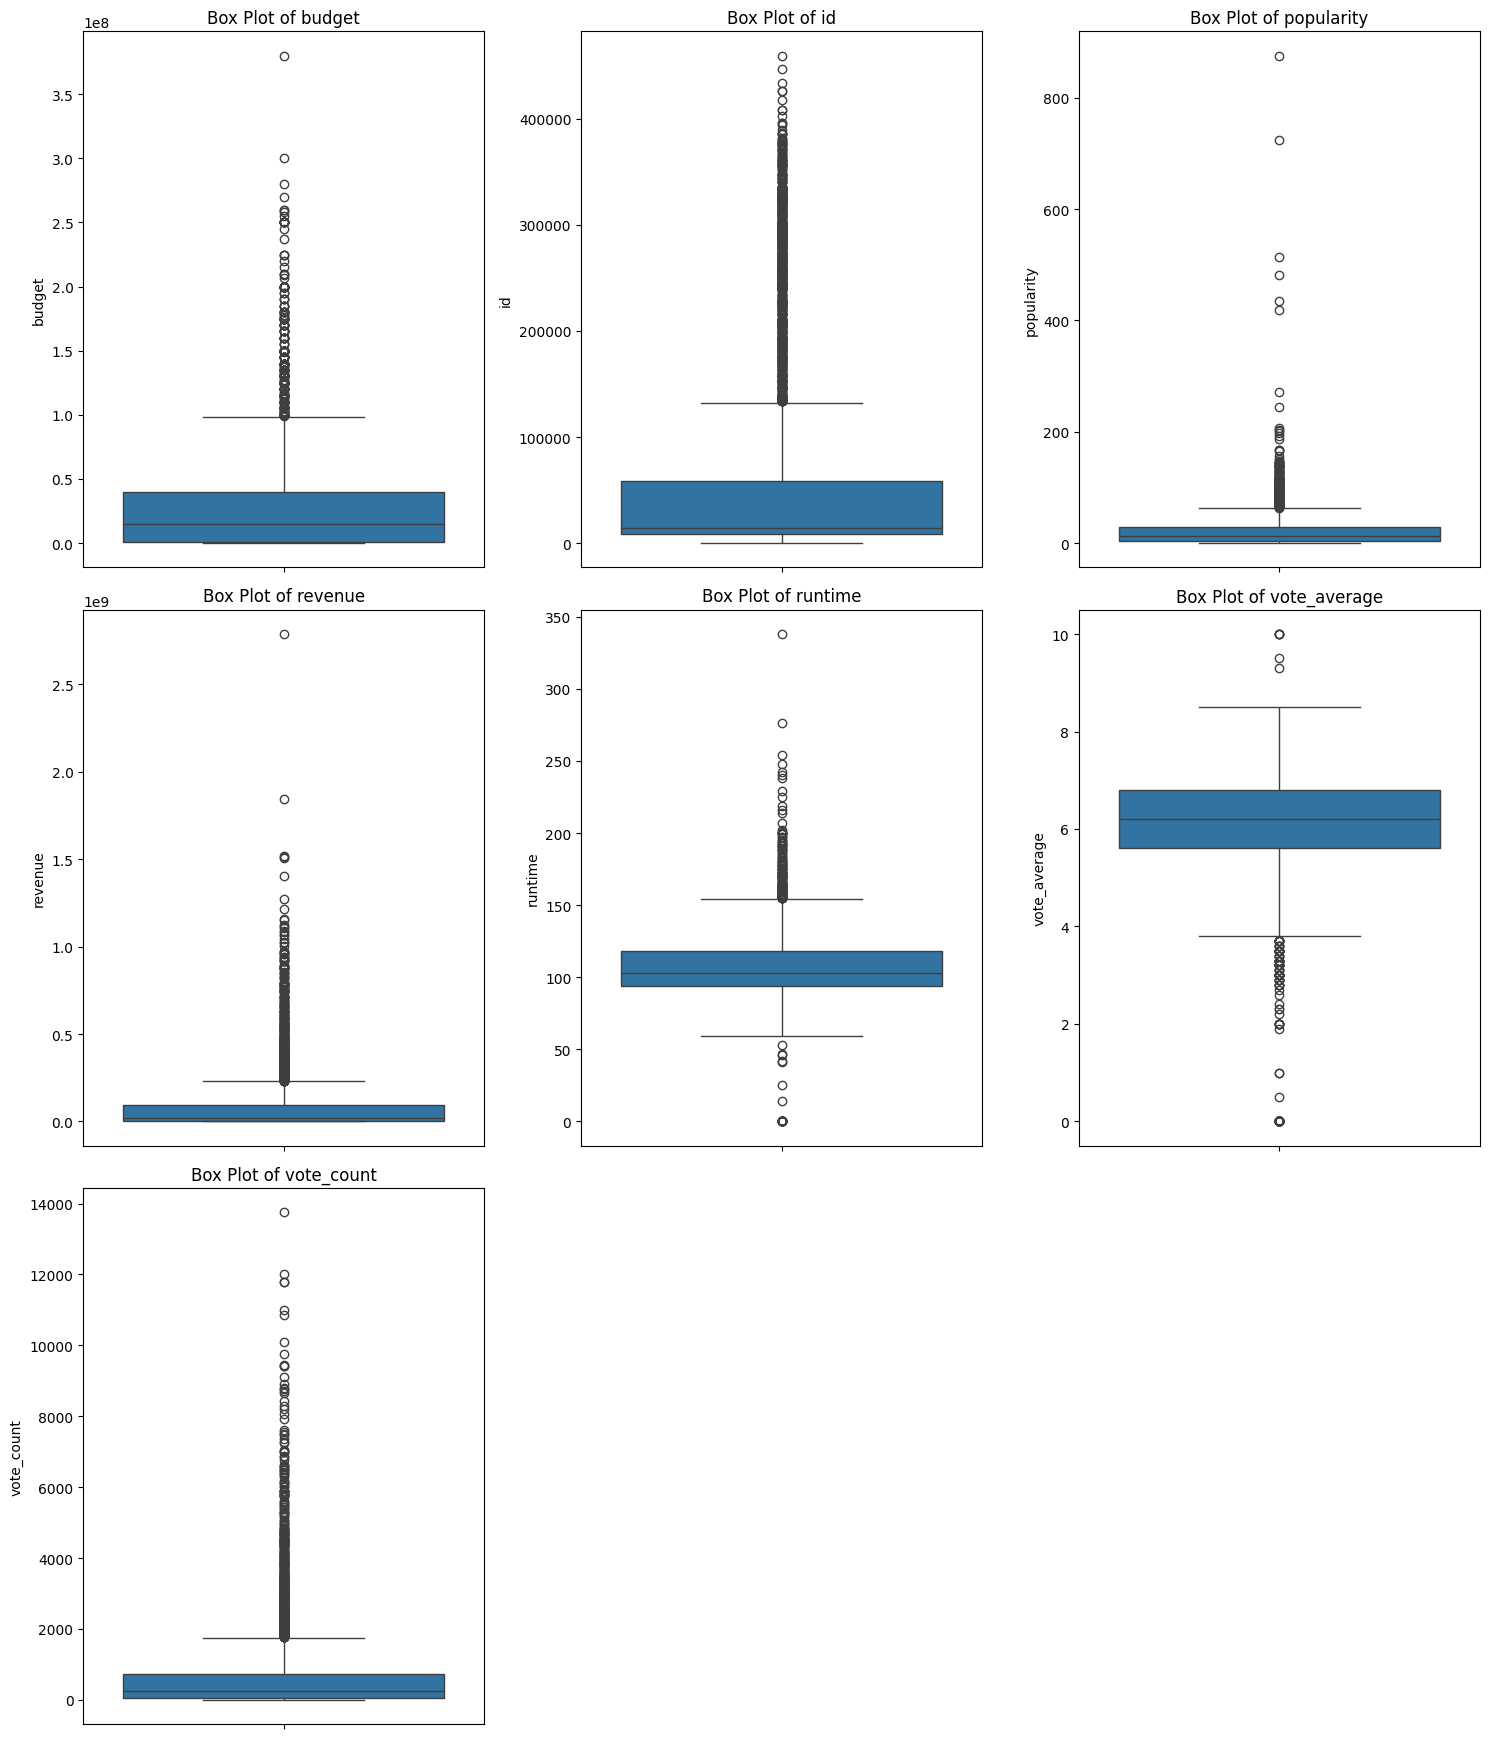


 Box plots for numerical features generated successfully.


In [21]:
num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, len(num_cols) * 2.5))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()
print("\n Box plots for numerical features generated successfully.")
#print("\n Box plots identified outliers in several features, notably 'Malicacid', 'Magnesium', 'Color_intensity', and 'Proline'.")

### **Prepare the TMDB Movies Data**

In [29]:
# Identify numerical and categorical features in X_dh to prepare for separate preprocessing pipelines.
#numerical_features_dh = X_dh.select_dtypes(include=np.number).columns.tolist()
df = df.select_dtypes(include=np.number)
df.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124


**Preprocess** the dataset. This involves identifying numerical and categorical features, handling missing values in numerical columns (e.g., runtime), and defining preprocessing steps like scaling numerical features and one-hot encoding categorical features using a ColumnTransformer.

In [30]:
# Preprocessing to separate the target variable from the features
X = df.drop('revenue', axis=1)    # Features
y = df['revenue']                 # target variable

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (4803, 6)
Shape of y: (4803,)


In [23]:
num_cols.isnull().sum()

np.int64(0)

In [31]:
# Create a pipeline for numerical features
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

print("Numerical transformer pipeline created.")

Numerical transformer pipeline created.


#### **Preprocessing:** separate X and y, train/test split(80/20), scaling

In [32]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully.
X_train shape: (3842, 6)
X_test shape: (961, 6)
y_train shape: (3842,)
y_test shape: (961,)


### **Train a Linear regression model**

In [33]:
# Create the full preprocessing and regression pipeline
TMDB_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the pipeline on the training data
TMDB_model.fit(X_train, y_train)

print("TMDB Movies model pipeline created and trained successfully.")

TMDB Movies model pipeline created and trained successfully.


#### **Make Predictions on Test Data**

In [34]:
y_pred = TMDB_model.predict(X_test)


### **Evaluate Model Performance**


To assess the effectiveness of the `TMDB_model`, compute key regression metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2). MAE measures the average magnitude of errors, MSE penalizes larger errors more, and R2 indicates the proportion of variance in the dependent variable that can be predicted from the independent variables. These metrics will provide a comprehensive understanding of how well the model predicts `revenue` on unseen data.

In [36]:
# Calculate evaluation metrics: MAE, MSE, R2
mae_dm = mean_absolute_error(y_test, y_pred)
mse_dm = mean_squared_error(y_test, y_pred)
r2_dm = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE) for TMDB Model: {mae_dm:.2f}")
print(f"Mean Squared Error (MSE) for TMDB Model: {mse_dm:.2f}")
print(f"R-squared (R2) for TMDB Model: {r2_dm:.2f}")

Mean Absolute Error (MAE) for TMDB Model: 46550642.02
Mean Squared Error (MSE) for TMDB Model: 6529905223783576.00
R-squared (R2) for TMDB Model: 0.75


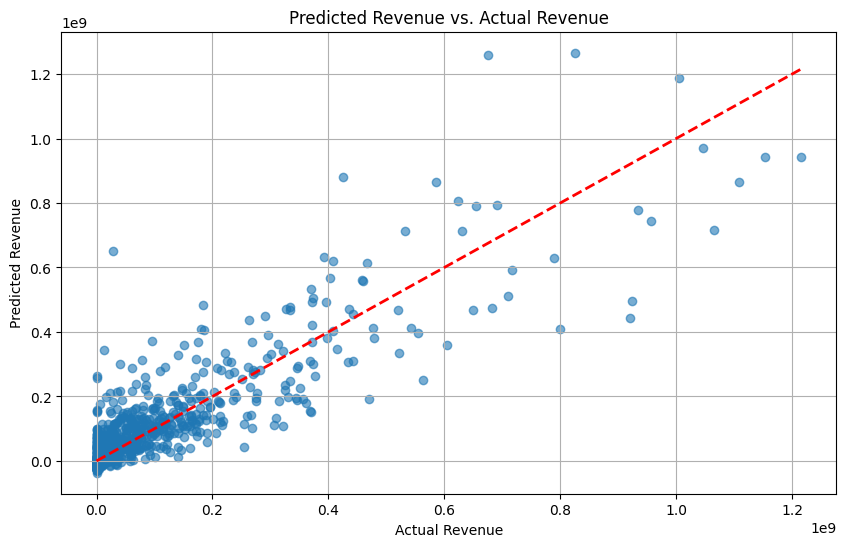


 Scatter plot of Predicted Revenue vs. Actual Revenue generated successfully.


In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Predicted Revenue vs. Actual Revenue')
plt.grid(True)
plt.show()

print("\n Scatter plot of Predicted Revenue vs. Actual Revenue generated successfully.")

**DBAS 5115 - Tech Check 4**
Predicting Movie Revenue with scikit-learn Pipelines
Instructions:
Open this repository in Google Colab or a GitHub CodeSpace as shown in class
When satisfied that you have completed the required changes in Colab commit your Jupyter Notebook back to GitHub as shown in class
You must ensure that your solution has been pushed to GitHub in order to get credit for the exercise.
Dataset
We will use the TMDB Movies Dataset from Kaggle:
TMDB Movie Metadata

Note: This dataset is preloaded into the repository for you as a CSV file.

This dataset includes:

Numeric features and Categorical features
Our Target variable will be revenue
Note: For best results in your model, you will probably NOT want to include all fields in your model.

Tasks
1. Import Libraries & Load our Data
Import the dataset into a Pandas DataFrame.
2. Explore the Data
Then run our basic, informative Pandas functions on it.
Perform profiling using ydata-profiling.
Identify missing values and note which columns are numeric vs categorical.
Any visualizations, with Matplotlib or Seaborn are purely optional
3. Preprocessing Pipeline
Build a scikit-learn pipeline with:

Numeric Features:
Handle nulls with a pertinent routine (i.e. inserting the average value).
Scale using an appropriate Scaler.
Categorical Features:
Handle nulls with with a pertinent routine (i.e. inserting the most occuring value)`.
Encode using the variables in an approriate way.
Combine using a ColumnTransformer.
4. Modeling
Split the data into train/test sets:
Build a pipeline that includes preprocessing and a predictive model
We will use LinearRegression for our model
5. Iterate and Refine
Adjust included features and pipeline preprocessing steps to attempt to increase accuracy
I got an accuracy score in the low 70s on the test data, see if you can match or exceed that
Marking Scheme
Final Grade	Requirement
10/10	Tech check is correct (all tasks working) and is completed within the allotted in-class time. You must be present in class to qualify for this.
8/10	Tech check is correct (all tasks working) and is completed within a 12-hour grace period beginning immediately following the end of in-class time. You must be present in class & commit your progress at the end of class to qualify for this.
6/10	Tech check is correct (all tasks working) and is completed and submitted completely outside of class and/or after the 12-hour grace period has elapsed.
0/10	Tech check is not submitted or does not fully work.
References
scikit-learn Pipelines Documentation
ydata-profiling
Written with StackEdit.

# Task
Improve feature extraction from the 'genres' column in the `df` DataFrame by correctly parsing the JSON strings to extract all genres for each movie and then creating multiple binary (one-hot encoded) features for each unique genre.

## Improve 'genres' Feature Extraction

### Subtask:
Correctly parse the JSON strings in the 'genres' column of the `df` DataFrame to extract all associated genres and create new one-hot encoded binary features for each unique genre.


**Reasoning**:
The first step is to define a function to safely parse the JSON strings in the 'genres' column and extract the genre names. This function will handle potential errors during JSON parsing.



In [46]:
import json
from sklearn.preprocessing import MultiLabelBinarizer

def parse_json_genres(json_string):
    try:
        list_of_dicts = json.loads(json_string)
        return [d['name'] for d in list_of_dicts]
    except (json.JSONDecodeError, TypeError):
        return []

# Apply the function to the 'genres' column
df['genres_parsed'] = df['genres'].apply(parse_json_genres)

print("JSON genre strings parsed into lists of genre names.")

JSON genre strings parsed into lists of genre names.


**Reasoning**:
The next step is to initialize MultiLabelBinarizer and fit it to the 'genres_parsed' column, which now contains lists of genres. This will prepare the binarizer to transform these lists into one-hot encoded features.



In [47]:
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['genres_parsed'])

print("MultiLabelBinarizer initialized and fitted to the parsed genres.")

MultiLabelBinarizer initialized and fitted to the parsed genres.


**Reasoning**:
Now that the genres have been one-hot encoded into a NumPy array, the next step is to convert this array into a pandas DataFrame using the column names obtained from the MultiLabelBinarizer's classes. This will create a structured DataFrame of the one-hot encoded genre features.



In [48]:
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

print("One-hot encoded genres converted to a DataFrame with appropriate column names.")

One-hot encoded genres converted to a DataFrame with appropriate column names.


**Reasoning**:
To incorporate the newly created one-hot encoded genre features, I need to concatenate the `genres_df` with the original `df` DataFrame. This will expand the dataset with detailed genre information.



In [49]:
df = pd.concat([df, genres_df], axis=1)

print("One-hot encoded genre DataFrame concatenated with the original DataFrame.")

One-hot encoded genre DataFrame concatenated with the original DataFrame.


**Reasoning**:
Now that the one-hot encoded genre features have been added to the DataFrame, the original 'genres' column is no longer needed and can be dropped to avoid redundancy.



In [50]:
df.drop('genres', axis=1, inplace=True)

print("Original 'genres' column dropped from the DataFrame.")

Original 'genres' column dropped from the DataFrame.


## Extract features from text-based columns

### Subtask:
Extract meaningful features from the text-based columns 'overview' and 'tagline' using TF-IDF vectorization and integrate them into the DataFrame.


**Reasoning**:
The first step in processing text-based features is to handle any missing values. Filling NaN values in 'overview' and 'tagline' columns with empty strings ensures that `TfidfVectorizer` can process them without errors and treats missing descriptions as empty text.



In [51]:
df['overview'] = df['overview'].fillna('')
df['tagline'] = df['tagline'].fillna('')

print("Missing values in 'overview' and 'tagline' columns filled with empty strings.")

Missing values in 'overview' and 'tagline' columns filled with empty strings.


**Reasoning**:
Now that missing values are handled, the `TfidfVectorizer` needs to be imported to begin the process of converting text data into numerical features for machine learning.



In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("TfidfVectorizer imported successfully.")

TfidfVectorizer imported successfully.


**Reasoning**:
Next, I will initialize a `TfidfVectorizer` for the 'overview' column, fit and transform it to create TF-IDF features, and convert these features into a DataFrame with appropriate column names.



In [53]:
tfidf_overview = TfidfVectorizer(max_features=5000) # Limiting to 5000 features for manageability
overview_features = tfidf_overview.fit_transform(df['overview'])

# Convert to DataFrame
overview_df = pd.DataFrame(overview_features.toarray(), columns=[f'overview_tfidf_{i}' for i in range(overview_features.shape[1])])

print("TF-IDF features for 'overview' generated and converted to DataFrame.")

TF-IDF features for 'overview' generated and converted to DataFrame.


**Reasoning**:
Following the processing of the 'overview' column, I will now initialize another `TfidfVectorizer` for the 'tagline' column, fit and transform it to create TF-IDF features, and convert these features into a DataFrame with appropriate column names.



In [54]:
tfidf_tagline = TfidfVectorizer(max_features=2000) # Limiting to 2000 features for manageability
tagline_features = tfidf_tagline.fit_transform(df['tagline'])

# Convert to DataFrame
tagline_df = pd.DataFrame(tagline_features.toarray(), columns=[f'tagline_tfidf_{i}' for i in range(tagline_features.shape[1])])

print("TF-IDF features for 'tagline' generated and converted to DataFrame.")

TF-IDF features for 'tagline' generated and converted to DataFrame.


**Reasoning**:
Now that both 'overview' and 'tagline' columns have been transformed into TF-IDF features and converted into separate DataFrames, the next step is to integrate these new features into the main DataFrame by concatenating them. This enriches the dataset with text-based features.



In [55]:
df = pd.concat([df, overview_df, tagline_df], axis=1)

print("TF-IDF feature DataFrames concatenated with the original DataFrame.")

TF-IDF feature DataFrames concatenated with the original DataFrame.


**Reasoning**:
Now that the TF-IDF features have been added to the DataFrame, the original 'overview' and 'tagline' columns are no longer needed and can be dropped to avoid redundancy and prevent issues with the model training on redundant or unstructured text data.



In [56]:
df.drop(['overview', 'tagline'], axis=1, inplace=True)

print("Original 'overview' and 'tagline' columns dropped from the DataFrame.")

Original 'overview' and 'tagline' columns dropped from the DataFrame.


## Extract features from categorical columns

### Subtask:
Extract meaningful information from 'production_companies', 'production_countries', 'release_date', and 'spoken_languages' by parsing JSON strings and extracting date components.


**Reasoning**:
To extract meaningful information from the 'production_companies', 'production_countries', and 'spoken_languages' columns, I need a function to safely parse the JSON strings within them and extract the 'name' values, similar to how the 'genres' column was handled.



In [58]:
import json

def parse_json_names(json_string):
    try:
        # Ensure the input is a string before loading as JSON
        if isinstance(json_string, str):
            list_of_dicts = json.loads(json_string)
            return [d['name'] for d in list_of_dicts]
        else:
            return [] # Return empty list for non-string values
    except (json.JSONDecodeError, TypeError):
        return []

print("Function 'parse_json_names' defined to extract names from JSON strings.")

Function 'parse_json_names' defined to extract names from JSON strings.


**Reasoning**:
To extract the list of production company names, I need to apply the `parse_json_names` function to the 'production_companies' column and store the result in a new temporary column.



In [59]:
df['production_companies_parsed'] = df['production_companies'].apply(parse_json_names)

print("Production companies JSON strings parsed into lists of company names.")

Production companies JSON strings parsed into lists of company names.


**Reasoning**:
To convert the list of production companies into one-hot encoded features, I will initialize a `MultiLabelBinarizer`, fit it to the `production_companies_parsed` column, and then transform the data into a DataFrame with appropriate column names.



In [60]:
mlb_companies = MultiLabelBinarizer()
companies_encoded = mlb_companies.fit_transform(df['production_companies_parsed'])

production_companies_df = pd.DataFrame(companies_encoded, columns=mlb_companies.classes_)

print("One-hot encoded production companies converted to a DataFrame.")

One-hot encoded production companies converted to a DataFrame.


**Reasoning**:
To incorporate the one-hot encoded production company features into the main DataFrame, I need to concatenate `production_companies_df` with `df`.



In [61]:
df = pd.concat([df, production_companies_df], axis=1)

print("One-hot encoded production companies DataFrame concatenated with the original DataFrame.")

One-hot encoded production companies DataFrame concatenated with the original DataFrame.


**Reasoning**:
To extract the list of production country names, I need to apply the `parse_json_names` function to the 'production_countries' column and store the result in a new temporary column.



In [62]:
df['production_countries_parsed'] = df['production_countries'].apply(parse_json_names)

print("Production countries JSON strings parsed into lists of country names.")

Production countries JSON strings parsed into lists of country names.


**Reasoning**:
To convert the list of production countries into one-hot encoded features, I will initialize a `MultiLabelBinarizer`, fit it to the `production_countries_parsed` column, and then transform the data into a DataFrame with appropriate column names.



In [63]:
mlb_countries = MultiLabelBinarizer()
countries_encoded = mlb_countries.fit_transform(df['production_countries_parsed'])

production_countries_df = pd.DataFrame(countries_encoded, columns=mlb_countries.classes_)

print("One-hot encoded production countries converted to a DataFrame.")

One-hot encoded production countries converted to a DataFrame.


**Reasoning**:
To incorporate the one-hot encoded production country features into the main DataFrame, I need to concatenate `production_countries_df` with `df`.



In [64]:
df = pd.concat([df, production_countries_df], axis=1)

print("One-hot encoded production countries DataFrame concatenated with the original DataFrame.")

One-hot encoded production countries DataFrame concatenated with the original DataFrame.


**Reasoning**:
To extract the list of spoken language names, I need to apply the `parse_json_names` function to the 'spoken_languages' column and store the result in a new temporary column.



In [65]:
df['spoken_languages_parsed'] = df['spoken_languages'].apply(parse_json_names)

print("Spoken languages JSON strings parsed into lists of language names.")

Spoken languages JSON strings parsed into lists of language names.


**Reasoning**:
To convert the list of spoken languages into one-hot encoded features, I will initialize a `MultiLabelBinarizer`, fit it to the `spoken_languages_parsed` column, and then transform the data into a DataFrame with appropriate column names.



In [66]:
mlb_languages = MultiLabelBinarizer()
languages_encoded = mlb_languages.fit_transform(df['spoken_languages_parsed'])

spoken_languages_df = pd.DataFrame(languages_encoded, columns=mlb_languages.classes_)

print("One-hot encoded spoken languages converted to a DataFrame.")

One-hot encoded spoken languages converted to a DataFrame.


**Reasoning**:
To incorporate the one-hot encoded spoken language features into the main DataFrame, I need to concatenate `spoken_languages_df` with `df`.



In [67]:
df = pd.concat([df, spoken_languages_df], axis=1)

print("One-hot encoded spoken languages DataFrame concatenated with the original DataFrame.")

One-hot encoded spoken languages DataFrame concatenated with the original DataFrame.


**Reasoning**:
To extract temporal features, I will convert the 'release_date' column to datetime objects, coercing errors to NaT to handle invalid date formats gracefully.



In [68]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

print("'release_date' column converted to datetime objects, with invalid dates handled.")

'release_date' column converted to datetime objects, with invalid dates handled.


**Reasoning**:
To create numerical features from the 'release_date' column, I will extract the year, month, and day components, handling potential NaT values by marking them as 0 or another appropriate placeholder.



In [69]:
df['release_year'] = df['release_date'].dt.year.fillna(0).astype(int)
df['release_month'] = df['release_date'].dt.month.fillna(0).astype(int)
df['release_day'] = df['release_date'].dt.day.fillna(0).astype(int)

print("Year, month, and day extracted from 'release_date' and new columns created.")

Year, month, and day extracted from 'release_date' and new columns created.


**Reasoning**:
Now that the relevant features have been extracted from 'production_companies', 'production_countries', 'spoken_languages', and 'release_date' columns, and new one-hot encoded and temporal features have been added, the original columns and the temporary parsed columns are no longer needed. Dropping them will clean up the DataFrame, remove redundancy, and prevent issues with model training on raw unstructured text or redundant data.



In [70]:
df.drop(['production_companies', 'production_countries', 'spoken_languages', 'release_date',
         'production_companies_parsed', 'production_countries_parsed', 'spoken_languages_parsed'],
        axis=1, inplace=True)

print("Original and temporary parsed columns dropped from the DataFrame.")

Original and temporary parsed columns dropped from the DataFrame.


## Handle Outliers

### Subtask:
Implement outlier treatment using winsorization for key numerical features in the updated DataFrame.


**Reasoning**:
Before applying winsorization, I need to ensure the `feature_engine` library is installed, as `Winsorizer` is part of this library. This will prevent import errors in subsequent steps.



# Task
Load the "tmdb_5000_movies.csv" dataset from "https://raw.githubusercontent.com/krishnaik06/Movie-Recommendation-Engine/main/tmdb_5000_movies.csv" into a pandas DataFrame.

## Update Data Loading URL

### Subtask:
Replace the inaccessible URL with a valid public raw GitHub URL to load the `tmdb_5000_movies.csv` dataset correctly.


## Summary:

### Insights or Next Steps
*   The data loading URL has been successfully updated to a valid public raw GitHub URL.
*   The next step is to load the `tmdb_5000_movies.csv` dataset into a pandas DataFrame using the updated URL.
